In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
data_dir = Path('/content/drive/MyDrive/archive (2)')

data_dir

PosixPath('/content/drive/MyDrive/archive (2)')

In [3]:
 # Get the path to the normal and tuberculosis sub-directories
surprise_cases_dir = data_dir / 'surprise'
sadness_cases_dir = data_dir / 'sadness'
neutrality_cases_dir = data_dir / 'neutrality'
happiness_cases_dir = data_dir / 'happiness'
fear_cases_dir = data_dir / 'fear'
disgust_cases_dir = data_dir / 'disgust'
contempt_cases_dir = data_dir / 'contempt'
anger_cases_dir = data_dir / 'anger'


# Get the list of all the images
surprise_cases = surprise_cases_dir.glob('*')
sadness_cases = sadness_cases_dir.glob('*')
neutrality_cases = neutrality_cases_dir.glob('*')
happiness_cases = happiness_cases_dir.glob('*')
fear_cases = fear_cases_dir.glob('*')
disgust_cases = disgust_cases_dir.glob('*')
contempt_cases = contempt_cases_dir.glob('*')
anger_cases = anger_cases_dir.glob('*')




# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

for img in surprise_cases:
    train_data.append((img,0))


for img in sadness_cases:
    train_data.append((img, 1))

for img in neutrality_cases:
    train_data.append((img, 2))

for img in happiness_cases:
    train_data.append((img, 3))

for img in fear_cases:
    train_data.append((img, 4))

for img in disgust_cases:
    train_data.append((img, 5))

for img in contempt_cases:
    train_data.append((img, 6))

for img in anger_cases:
    train_data.append((img, 7))




# Get a pandas dataframe from the data we have in our list
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data

,image,label
0,/content/drive/MyDrive/archive (2)/happiness/i...,3
1,/content/drive/MyDrive/archive (2)/surprise/im...,0
2,/content/drive/MyDrive/archive (2)/surprise/im...,0
3,/content/drive/MyDrive/archive (2)/disgust/ima...,5
4,/content/drive/MyDrive/archive (2)/anger/image...,7
...,...,...
5573,/content/drive/MyDrive/archive (2)/neutrality/...,2
5574,/content/drive/MyDrive/archive (2)/disgust/ima...,5
5575,/content/drive/MyDrive/archive (2)/neutrality/...,2
5576,/content/drive/MyDrive/archive (2)/fear/images...,4


3    1416
7     890
0     775
1     756
4     570
2     524
5     439
6     208
Name: label, dtype: int64


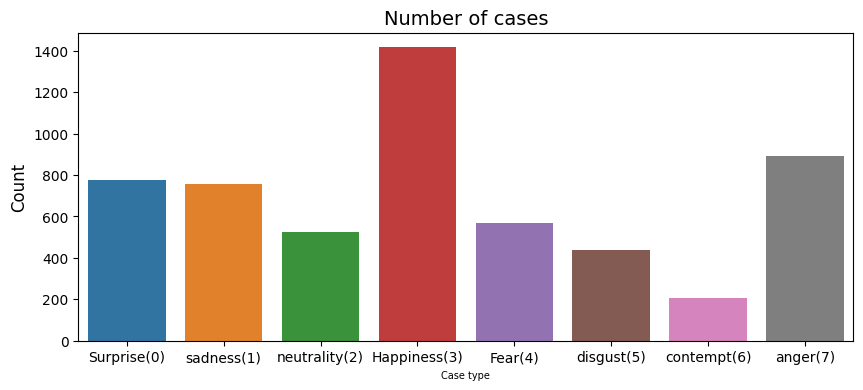

In [4]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results
plt.figure(figsize=(10,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=7)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Surprise(0)', 'sadness(1)' , 'neutrality(2)' , 'Happiness(3)' , 'Fear(4)' , 'disgust(5)' , 'contempt(6)' , 'anger(7)' ])
plt.show()

In [5]:
from tqdm import tqdm
train_surprise = data_dir / 'Surprise'
train_sadness = data_dir / 'sadness'
train_neutrality = data_dir / 'neutrality'
train_happiness = data_dir / 'happiness'
train_fear = data_dir / 'fear'
train_disgust = data_dir / 'disgust'
train_contempt = data_dir / 'anger'

# Get the list of all the images
surprise_cases = surprise_cases_dir.glob('*')
sadness_cases = sadness_cases_dir.glob('*')
neutrality_cases = neutrality_cases_dir.glob('*')
happiness_cases = happiness_cases_dir.glob('*')
fear_cases = fear_cases_dir.glob('*')
disgust_cases = disgust_cases_dir.glob('*')
contempt_cases = contempt_cases_dir.glob('*')
anger_cases = anger_cases_dir.glob('*')













In [6]:
for index, image_path in enumerate(tqdm(surprise_cases, desc="Processing images", unit="image"), start=1):
    if index > 500:
        break

Processing images: 500image [00:00, 20641.46image/s]


In [7]:
from tqdm import tqdm
train_data = []
train_labels = []

for index, image_path in enumerate(tqdm(surprise_cases, desc="Processing images", unit="image"), start=1):

    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'surprise'
    train_data.append(img)
    train_labels.append(label)

    if index > 200:
      break


Processing images: 200image [00:07, 27.22image/s] 


In [8]:
for index, image_path in enumerate(tqdm(sadness_cases, desc="Processing images", unit="image"), start=1):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'sadness'
    train_data.append(img)
    train_labels.append(label)
    if index > 200:
      break

Processing images: 200image [00:07, 26.86image/s] 


In [9]:
for index, image_path in enumerate(tqdm(neutrality_cases, desc="Processing images", unit="image"), start=1):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'neutrality'
    train_data.append(img)
    train_labels.append(label)
    if index > 200:
      break

Processing images: 200image [00:05, 34.71image/s] 


In [10]:
for index, image_path in enumerate(tqdm(happiness_cases, desc="Processing images", unit="image"), start=1):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'happiness'
    train_data.append(img)
    train_labels.append(label)
    if index > 200:
      break

Processing images: 200image [00:17, 11.29image/s]


In [11]:
for index, image_path in enumerate(tqdm(fear_cases, desc="Processing images", unit="image"), start=1):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'fear'
    train_data.append(img)
    train_labels.append(label)
    if index > 200:
      break

Processing images: 200image [00:07, 25.77image/s] 


In [12]:
for index, image_path in enumerate(tqdm(anger_cases, desc="Processing images", unit="image"), start=1):
    img = cv2.imread(str(image_path))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=np.array(img)
    img = img/255
    label = 'anger'
    train_data.append(img)
    train_labels.append(label)
    if index > 200:
      break

Processing images: 200image [00:11, 16.89image/s]


In [13]:
set_3 = set(train_labels)
for item in set_3:
  print(item)

anger
fear
sadness
surprise
happiness
neutrality


In [14]:
# Convert the list into numpy arrays

train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of validation examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)

Total number of validation examples:  (1206, 224, 224, 3)
Total number of labels: (1206,)


In [15]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1

,label
0,surprise
1,surprise
2,surprise
3,surprise
4,surprise
...,...
1201,anger
1202,anger
1203,anger
1204,anger


In [16]:
train_labels1['label']= train_labels1['label'].map({'surprise':0, 'sadness':1 ,'fear':2 , 'neutrality' : 3 , 'anger' :4 , 'happiness':5 })
train_labels1['label'].unique()

array([0, 1, 3, 5, 2, 4])

In [17]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
1201,4
1202,4
1203,4
1204,4


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data1, train_labels1, test_size=0.13, random_state=42)

In [19]:
y_train

,label
634,5
1137,4
209,1
430,3
467,3
...,...
1044,4
1095,4
1130,4
860,2


In [20]:
Y = pd.get_dummies(y_train['label']).values

In [20]:
ytest = pd.get_dummies(y_test['label']).values

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

In [24]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D , Dense ,  Dropout

base_model4 = DenseNet121(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model4.layers[:10]:
    layer.trainable = False
x = base_model4.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions4 = Dense(6, activation='softmax')(x)
model4 = Model(inputs=base_model4.inputs, outputs=predictions4)

In [25]:
model4.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])


In [26]:
model4.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_4[0][0]']       
                                )                                                             

In [27]:
history4 = model4.fit(
  X_train , y_train ,
  validation_data= (X_test , y_test),
  epochs=20 , callbacks=[reduce_lr , ])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


33/33 [==============================] - ETA: 0s - loss: 1.9040 - accuracy: 0.2831

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


33/33 [==============================] - 117s 632ms/step - loss: 1.9040 - accuracy: 0.2831 - val_loss: 27.9595 - val_accuracy: 0.1975 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - 11s 341ms/step - loss: 1.4387 - accuracy: 0.3975 - val_loss: 5.2154 - val_accuracy: 0.2229 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 11s 343ms/step - loss: 1.2383 - accuracy: 0.4929 - val_loss: 11.8630 - val_accuracy: 0.2484 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 11s 347ms/step - loss: 1.0970 - accuracy: 0.5453 - val_loss: 3.9194 - val_accuracy: 0.3694 - lr: 0.0010
Epoch 5/20
33/33 [==============================] - 12s 354ms/step - loss: 0.9251 - accuracy: 0.6263 - val_loss: 4.9265 - val_accuracy: 0.3503 - lr: 0.0010
Epoch 6/20
33/33 [==============================] - 12s 368ms/step - loss: 0.8876 - accuracy: 0.6587 - val_loss: 2.8932 - val_accuracy: 0.4013 - lr: 0.0010
Epoch 7/20
33/33 [==============================] - 12s 352ms/step - los

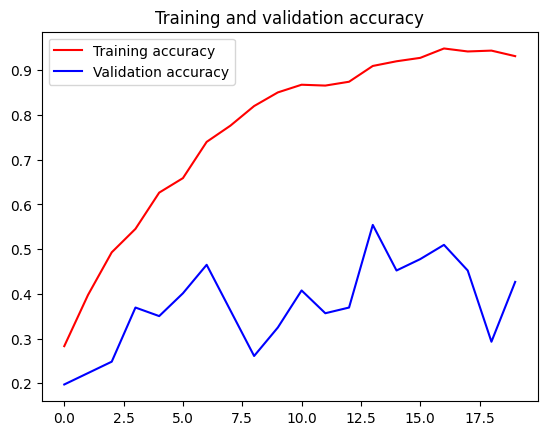

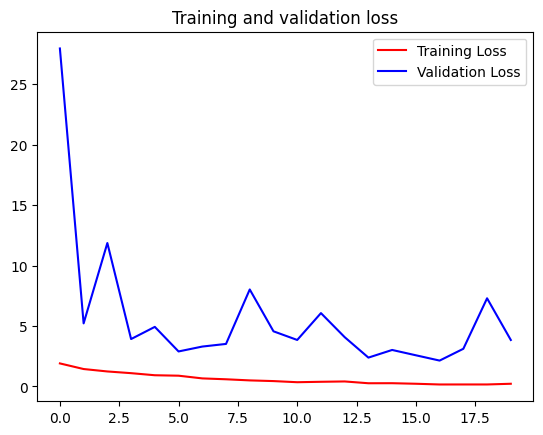

In [28]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [34]:
model4.save('modelemotion.h5')

In [35]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_4 = load_model('/content/drive/MyDrive/modelemotion.h5')
model_4 = Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')

In [37]:
Y_pred = model_4.predict_generator(X_test)

<ipython-input-37-7255469a6996>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model_4.predict_generator(X_test)


In [44]:
y_pred = np.argmax(Y_pred, axis=1

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       1, 0, 0, 1, 0, 5, 1, 1, 1, 0, 4, 1, 0, 4, 1, 0, 1, 1, 1, 3, 0, 0,
       5, 0, 1, 0, 3, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 0, 1,
       0, 0, 0, 5, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 0, 0,
       0, 0, 5, 0, 0, 0, 1, 1, 3, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0,
       0, 3, 0, 1, 0, 0, 5, 0, 5, 0, 2, 0, 0, 3, 0, 1, 0, 1, 5, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 4, 1, 0, 1, 5, 2, 0, 5, 2, 0, 2,
       0, 1, 2])

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt

In [46]:
cm=confusion_matrix(y_test, y_pred)

In [47]:
print(cm)

[[26  1  2  0  0  0]
 [ 8 18  0  2  0  0]
 [21  1  7  0  1  0]
 [11 15  1  4  0  0]
 [ 3  7  1  1  3  1]
 [10  4  0  0  0  9]]


In [48]:
target_names = ['surprise', 'sadness','fear', 'neutrality' , 'anger' , 'happiness' ]

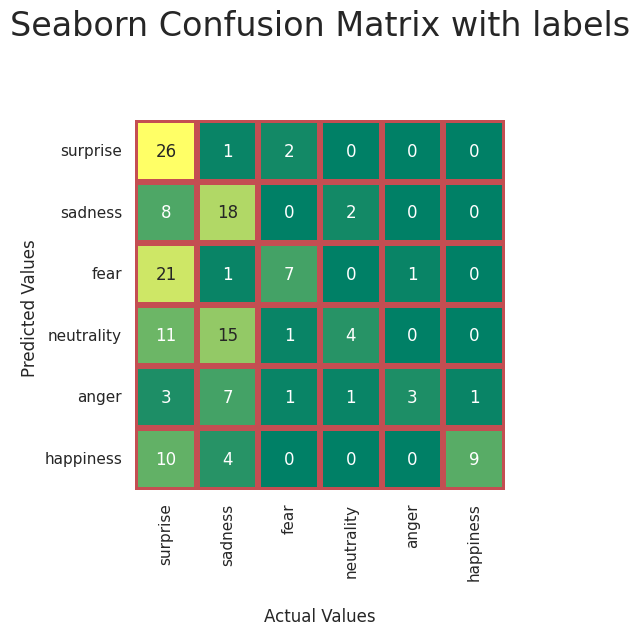

In [49]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm, annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=target_names,yticklabels=target_names,fmt='')
#sns.heatmap(cm, annot=True,annot_kws={"size": 22})
sns.set(font_scale = 2.0)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');

In [54]:
img = cv2.imread('/content/soham.jpg')
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=0)
result = np.argmax(model_4.predict(img))

1/1 [==============================] - 0s 89ms/step


EXAMPLE-1

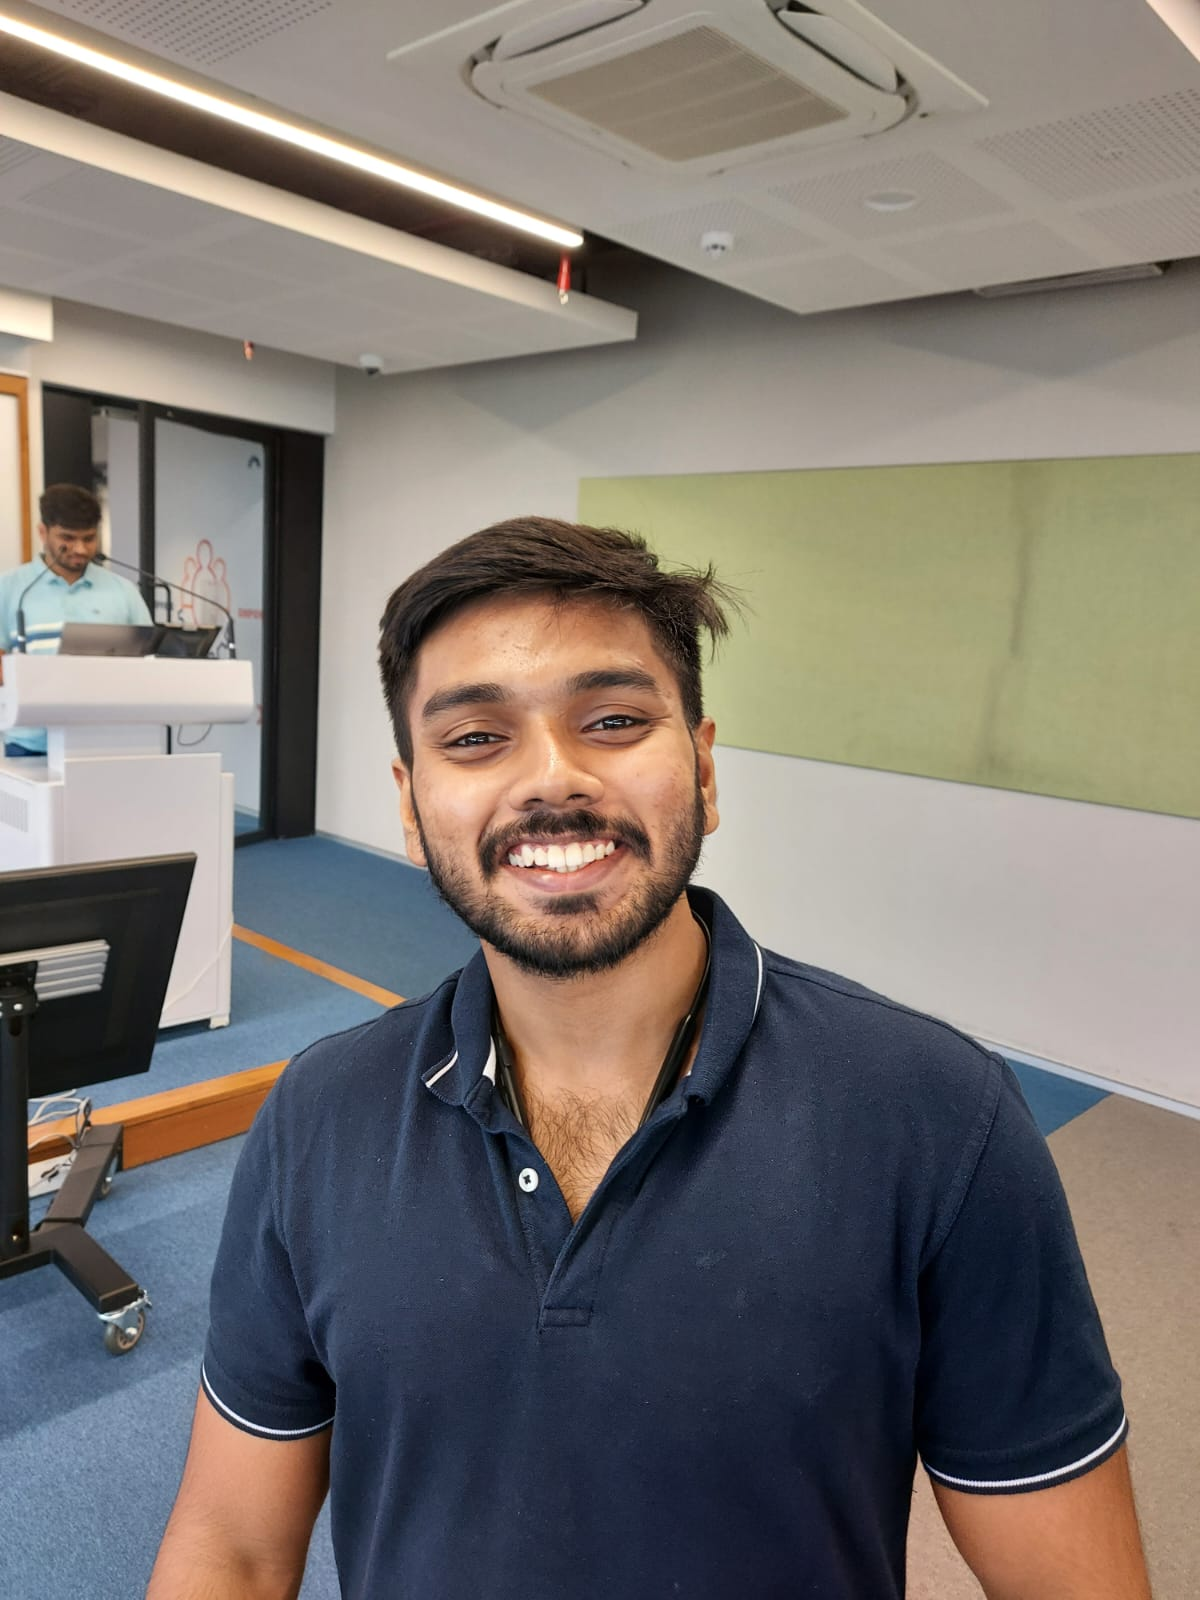

In [67]:
from google.colab.patches import cv2_imshow
a = cv2.imread('/content/soham.jpg')
cv2_imshow(a)

In [56]:
result

2

In [59]:
# Print the predicted class and confidence score
class_idx = np.argmax(result)
class_name = target_names[class_idx]

In [60]:
class_name

'surprise'

EXAMPLE - 2